# tf-03-logic-ext
## 目标
本例中，我们要使用tensorflow完成逻辑回归

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)

1.4.0


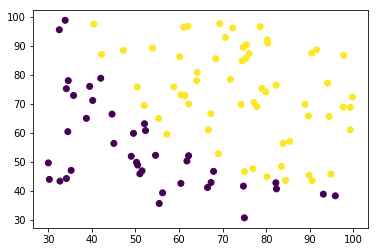

Octave theta: -25.16127 0.20623 0.20147
Actual theta: [[-24.99995995]
 [  0.20494072]
 [  0.20016605]]

Octave Cost: 0.20350
Actual Cost: 0.203502

Octave Accuracy: 0.89
Actual Accuracy: 0.89


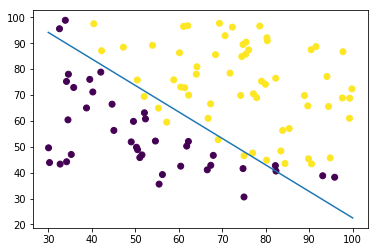

In [2]:
def read_data(file_name, delimiter=','):
    return np.loadtxt(file_name, delimiter=delimiter)

def init_data(input_data):
    input_x = input_data[:, 0:-1]
    input_y = input_data[:, -1].reshape(m, 1)
    input_x = np.concatenate((np.ones([m, 1]), input_x), 1)
    return input_x, input_y

def tensor_flow_run(input_x, input_y, init_w):
    # 初始化参数
    x = tf.placeholder("float32", [None, n])  # m*n
    y = tf.placeholder("float32", [None, 1])  # m*1
    W = tf.Variable(init_w)  # n*1
    # 构建模型
    z = tf.matmul(x, W)  # m*1
    h = tf.sigmoid(z)  # m*1
    # 构建代价函数
    cost = (tf.reduce_sum(y*tf.log(h)) + tf.reduce_sum((1-y) * (tf.log(1-h)))) / (-m)
    # 梯度下降算法参数配置
    train_op = tf.train.GradientDescentOptimizer(LEARNING_RATE).minimize(cost)
    # 判断训练集合上的准确性
    predict = tf.greater_equal(tf.sigmoid(tf.matmul(x, W)), 0.5)
    y_ = tf.equal(y, 1)
    correct_prediction = tf.equal(predict, y_)
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    with tf.Session() as sess:
        # 初始化
        init = tf.global_variables_initializer()
        sess.run(init)
        # 梯度下降算法
        for _ in range(ITERATIONS):
            sess.run(train_op, feed_dict={x: input_x, y: input_y})
        # 参数列表
        print('Octave theta: -25.16127 0.20623 0.20147')
        W_value = sess.run(W)
        print('Actual theta:', W_value)
        # 代价函数
        print('\nOctave Cost: 0.20350')
        print('Actual Cost:', sess.run(cost, feed_dict={x: input_x, y: input_y}))
        # 正确率
        print('\nOctave Accuracy: 0.89')
        print('Actual Accuracy:', sess.run(accuracy, feed_dict={x: input_x, y: input_y}))
        
        plt.scatter(input_x[:,1],input_x[:,2],c=input_y[:,0])
        # theta0 + theta1*x1 + theta2*x2 = 0
        X = np.linspace(30, 100, 256, endpoint=True)
        Y = (W_value[0] + W_value[1]*X)/-W_value[2]
        plt.plot(X,Y)
        plt.show()
        
        
# 设置超参数
LEARNING_RATE = 0.001
ITERATIONS = 500
# 读取数据
raw_data = read_data('../data/ex2data1.txt')
# 获取样本数量，属性数量
m = raw_data.shape[0]
n = raw_data.shape[1]

# print(raw_data)
# print(raw_data.shape)
# print(raw_data[:,0])
# print(raw_data[:,1])
plt.scatter(raw_data[:,0],raw_data[:,1],c=raw_data[:,2])
plt.show()

# 获取输入数据
data = init_data(raw_data)
# 进行机器学习运算
# print(data[0])
tensor_flow_run(data[0], data[1], [[-25], [0.2], [.2]])